In [70]:
from scipy.signal import convolve2d
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.metrics import structural_similarity as ssim



In [4]:
import zipfile
path_to_zip_file="/content/ALL-2views.zip"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall("")

In [96]:

data_dirs = ['Aloe']
# data_dirs = ['']


def stereoMatchSAD(left_img_path, right_img_path, folder):
    left_img = np.array(Image.open(left_img_path).convert('L'), dtype=np.float64)
    right_img = np.array(Image.open(right_img_path).convert('L'), dtype=np.float64)

    h, w = left_img.shape
    max_offset = 60
    offset_adjust = 255 / max_offset
    window_size = 11
    half_window = window_size // 2

    min_sad = np.full((h, w), np.inf)
    depth = np.zeros((h, w), dtype=np.float64)
    # plt.imshow(depth, cmap="gray")

    for offset in tqdm(range(1, max_offset), desc="Processing SAD"):
        ad = np.zeros((h, w))

        ad[:, offset:] = np.abs(left_img[:, offset:] - right_img[:, :-offset])

        win_sad = cv2.boxFilter(ad, ddepth=-1, ksize=(window_size, window_size))

        mask = win_sad < min_sad
        min_sad[mask] = win_sad[mask]
        depth[mask] = offset * offset_adjust

    plt.imshow(depth, cmap="gray")
    plt.savefig(f"{fold}/depth_SAD60.png")
    plt.show()

    return depth


Aloe/view5.png


Processing SAD: 100%|██████████| 59/59 [00:00<00:00, 309.25it/s]


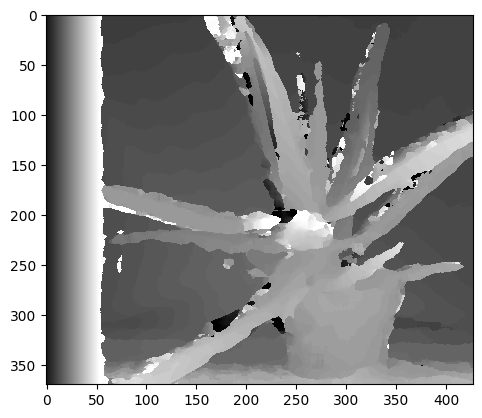

In [97]:
for fold in data_dirs:
    imageleft =  fold + '/view1.png'
    imageright =  fold + '/view5.png'
    # imageleft =  fold + '15.jpg'
    # imageright =  fold + 'img10.jpg'
    print(imageright)
    a=stereoMatchSAD(imageleft, imageright,fold)

In [100]:
def calculate_metrics(image1_path, image2_path):
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    mse_value = np.mean((img1 - img2) ** 2)

    rmse_value = np.sqrt(mse_value)

    ssim_value, _ = ssim(gray1, gray2, full=True)

    return mse_value, rmse_value, ssim_value

image1 = "/content/Aloe/depth_SAD60.png"
image2 = "/content/Aloe/disp5.png"

mse, rmse, ssim_score = calculate_metrics(image1, image2)


In [101]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"SSIM: {ssim_score}")

MSE: 108.61549153645834
RMSE: 10.421875624687637
SSIM: 0.43515580082396954


In [102]:
image1 = "/content/Baby1/depth_SAD60.png"
image2 = "/content/Baby1/disp5.png"

mse, rmse, ssim_score = calculate_metrics(image1, image2)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"SSIM: {ssim_score}")

MSE: 108.04427083333333
RMSE: 10.39443460864194
SSIM: 0.5187613784821629


In [45]:
image1 = "/content/Aloe/depth_SAD60.png"
image2 = "/content/Aloe/disp5.png"

mse, rmse, ssim_score = calculate_metrics(image1, image2)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"SSIM: {ssim_score}")

MSE: 108.81472330729167
RMSE: 10.43142959077478
SSIM: 0.42145108249848956


In [60]:
image1 = "/content/Baby1/depth_SAD60.png"
image2 = "/content/Baby1/disp5.png"
#values for window size 60, better mse rmse ssim but not very accurate with regards to edges, i.e kind of blurry
mse, rmse, ssim_score = calculate_metrics(image1, image2)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"SSIM: {ssim_score}")

MSE: 100.82367513020833
RMSE: 10.041099298891947
SSIM: 0.5818394868652902
